In [80]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
m = 1000
X = 2 * np.random.randn(m, 1)
Y = 12.467 + 5.3 *X + np.random.randn(m,1)

X_a = add_dummy_feature(X)

In [81]:
result = np.linalg.inv(X_a.T @ X_a) @ X_a.T @ Y
#result = np.linalg.pinv(X_a) @ Y
#result, residuals, rank, s = np.linalg.lstsq(X_a, Y, rcond=None)
print(result)

[[12.43018396]
 [ 5.30990658]]


In [82]:
X_new = 2 * np.random.randn(200, 1)
Y_true = 12.467 + 5.3 *X_new + np.random.randn(200,1)
X_new_a = add_dummy_feature(X_new)
Y_pred = X_new_a @ result

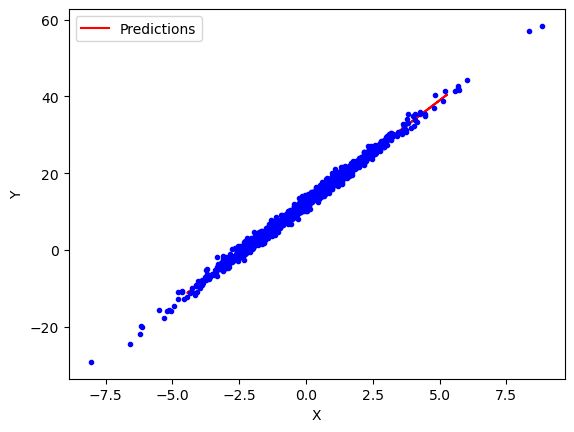

In [83]:
plt.plot(X_new, Y_pred, "r-", label="Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [84]:
mse = np.mean((Y_true - Y_pred)**2)


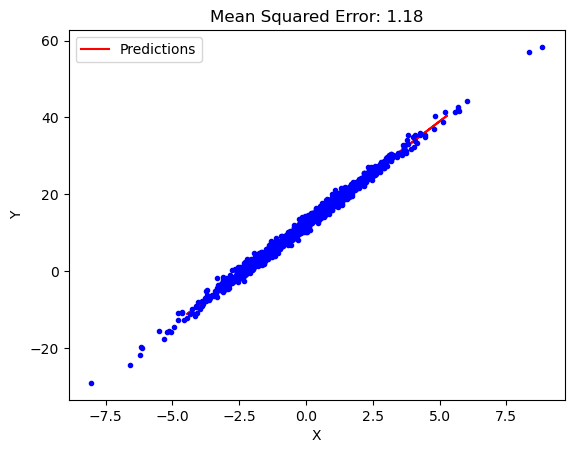

In [85]:
plt.plot(X_new, Y_pred, "r-", label="Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f"Mean Squared Error: {mse:.2f}")
plt.show()

[[12.43018394]
 [ 5.30990658]]


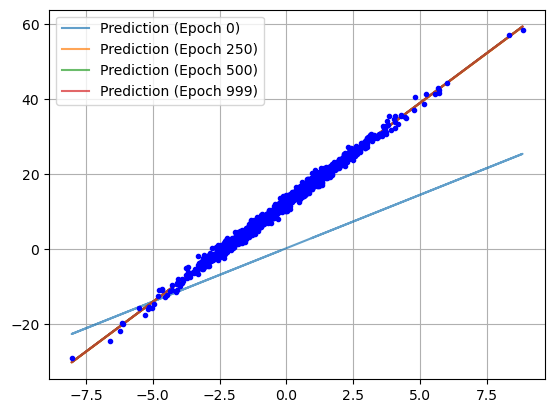

In [86]:
eta = 0.01
n_epochs = 1000
theta = np.random.randn(2,1)
n = len(X_a)



for epochs in range(n_epochs):
    mse_grad = 2 / n * X_a.T @ (X_a @ theta - Y)
    theta = theta - eta * mse_grad 
    if epochs in [0, int(n_epochs / 4), int(n_epochs / 2), n_epochs - 1]:
        plt.plot(X, X_a @ theta, label=f"Prediction (Epoch {epochs})", alpha=0.7)
        
print(theta)

plt.plot(X, Y, "b.")
plt.legend()
plt.grid()
plt.show()

In [87]:

theta = np.random.randn(2, 1)
h, j = 1, 10

def eta_f(k):
    return h / (k + j)


for epochs in range(n_epochs):
    for i in range(n):
        rand_idx = np.random.randint(n)
        xi = X_a[rand_idx: rand_idx + 1]
        yi = Y[rand_idx: rand_idx + 1]
        mse_grad = 2 * xi.T @ (xi @ theta - yi)
        eta = eta_f(epochs * n + i)
        theta = theta - eta * mse_grad


print("Final theta values:", theta)


Final theta values: [[12.42943572]
 [ 5.31180453]]


In [88]:

def mse_grad_f(X, Y, theta):
    return 2 / len(X) * X.T @ (X @ theta - Y)

eta = 0.01
n_epochs = 1000 
theta = np.random.randn(2, 1)
batch_size = 50
n = len(X_a)

for epoch in range(n_epochs):
    idxs = np.random.permutation(n)
    X_shuffled = X_a[idxs]
    Y_shuffled = Y[idxs]
    
    for i in range(0, n, batch_size):
        X_batch = X_shuffled[i:i + batch_size]
        Y_batch = Y_shuffled[i:i + batch_size]
        mse_grad = mse_grad_f(X_batch, Y_batch, theta) 
        theta = theta - eta * mse_grad

print("Final theta values (Mini-Batch Gradient Descent):", theta)


Final theta values (Mini-Batch Gradient Descent): [[12.42947222]
 [ 5.31249475]]


In [89]:
sgd = SGDRegressor(max_iter=1000,random_state=60, eta0=0.01)
sgd.fit(X, Y.ravel())
print(sgd.intercept_)
print(sgd.coef_)

[12.43337655]
[5.30584296]


In [90]:
batch_size = 100
n = len(X_a)

sgd_re = SGDRegressor(max_iter=1000, tol=1e-3)


for i in range(0, n, batch_size):
    X_batch = X_a[i:i + batch_size]
    y_batch = Y[i:i + batch_size]
    sgd_re.partial_fit(X_batch, y_batch.ravel())

accuracy = sgd_re.score(X_a, Y)
print(f"Model accuracy after partial fitting: {accuracy:.2f}")

Model accuracy after partial fitting: 0.99
